<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/gasvaluechain/energystatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Enenrgy Statistics
This chapter will present statistics of energy consumption and sources for energy.

# Litterature

* https://www.bp.com/en/global/corporate/energy-economics/energy-outlook/introduction/executive-summary.html

https://www.equinor.com/no/sustainability/energy-perspectives.html

https://www.shell.com/energy-and-innovation/natural-gas/liquefied-natural-gas-lng/lng-outlook-2021.html#iframe=L3dlYmFwcHMvTE5HX091dGxvb2svMjAyMS8

https://www.enerdata.net/publications/reports-presentations/world-energy-trends.html

Euro stat:
https://ec.europa.eu/eurostat/web/main/home

# Data

https://data.worldbank.org/

EU - energy stat: https://ec.europa.eu/eurostat/cache/infographs/energy/index.html?lang=en




# World energy production

https://www.bp.com/en/global/corporate/energy-economics/energy-outlook/introduction/overview.html


Enenrgy productions:
https://www.bp.com/en/global/corporate/energy-economics/energy-outlook/introduction/overview.html


Energy production figure 7% distribution of energy procution technologies):

https://cfvod.kaltura.com/p/895641/sp/89564100/thumbnail/entry_id/1_tqyhvh3a/version/100021/width/570/height/320



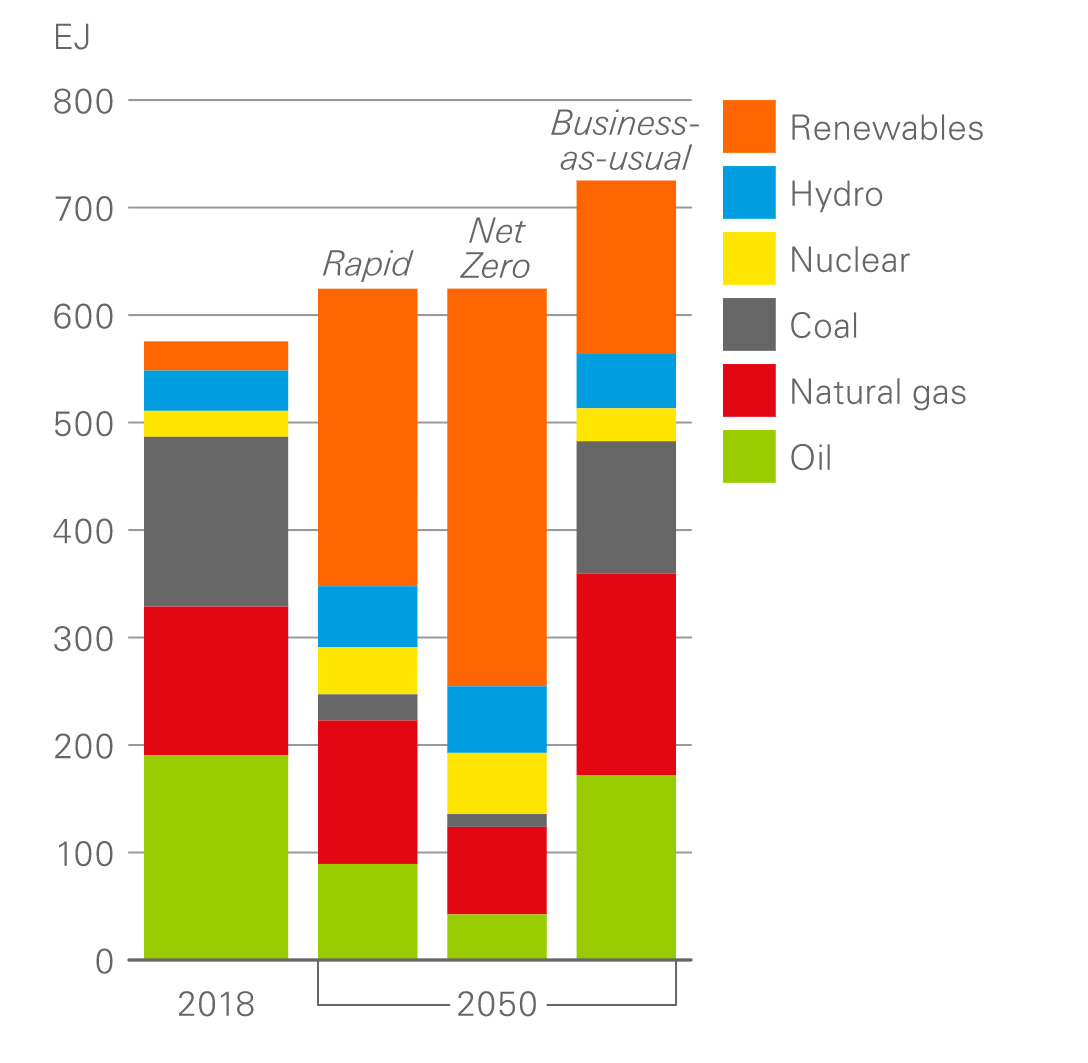

# From where does EU import the energy

https://ec.europa.eu/eurostat/cache/infographs/energy/bloc-2c.html




# Natural Gas

https://www.iea.org/fuels-and-technologies/gas


https://www.shell.com/energy-and-innovation/natural-gas/providing-more-and-cleaner-energy.html




# CO2 emission

https://www.eia.gov/energyexplained/energy-and-the-environment/where-greenhouse-gases-come-from.php

How much carbon dioxide is produced when different fuels are burned?

https://www.eia.gov/tools/faqs/faq.php?id=73&t=11



#World energy outlook

https://www.iea.org/reports/world-energy-outlook-2020

# Excercise

## Introduction to Colab and Tools
Colaboratory (Colab) is a Jupyter notebook environment that requires no setup and runs entirely in the cloud. To learn more about Colab see the [Welcome To Colaboratory page](https://colab.research.google.com/notebooks/welcome.ipynb). A useful tool for data analysis is the [Pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb#scrollTo=JndnmDMp66FL) API. To understand the data better it helps to be able to visualize it in various ways. [Matplotlib](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb) is the most common low-level visualization library for Python.

## Natural Gas Statistics
In the following websites you will find sources for information and data that can be used for solving the problems. Also use the internet to search for relevant information.



*   [Statistics Norway](https://www.ssb.no/en/)
*   [European Statistics](https://ec.europa.eu/eurostat/)
*   [Norwegian Petroleum](https://www.norskpetroleum.no/en/)
*   [World Bank Open Data](https://data.worldbank.org/)
*   [IEA Data and Statistics](https://www.iea.org/data-and-statistics)




# Q1: Oil and Gas Production Statistics
Show a table and a graphical presentation of oil and gas production volumes from the Norwegian Shelf based on statistical data (see example and update with more data). Can you do the same for world oil and gas production?


## Q1 solution:

In [1]:
import urllib.request
import pandas as pd

url="https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_production_totalt_NCS_year__DisplayAllRows&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=143.97.2.35&CultureCode=en"

testfile = urllib.request.urlopen(url)
proddata=pd.read_csv(testfile)
proddata.head()

,prfYear,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3
0,2021,58.509,64.606,8.563,0.429,132.106,102.409
1,2020,98.390,112.296,16.767,1.282,228.735,169.419
2,2019,81.727,115.123,17.375,1.655,215.880,168.157
3,2018,86.269,122.203,19.457,1.714,229.643,173.389
4,2017,92.278,124.664,20.395,1.707,239.045,171.881


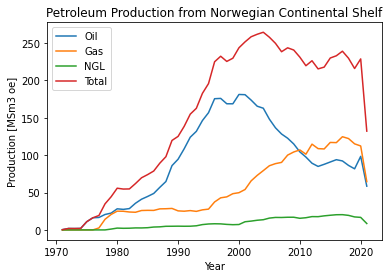

In [2]:
proddata2 = proddata.rename(columns={"prfPrdOilNetMillSm3": "Oil", "prfPrdGasNetBillSm3": "Gas", "prfPrdNGLNetMillSm3": "NGL", "prfPrdOeNetMillSm3": "Total"})
import matplotlib.pyplot as plt
plt.plot( 'prfYear', 'Oil', data=proddata2)
plt.plot( 'prfYear', 'Gas', data=proddata2)
plt.plot( 'prfYear', 'NGL', data=proddata2)
plt.plot( 'prfYear', 'Total', data=proddata2)
plt.ylabel('Production [MSm3 oe]')
plt.xlabel('Year')
plt.title("Petroleum Production from Norwegian Continental Shelf")
plt.legend()

Text(0.5, 1.0, 'World Petroleum Production')

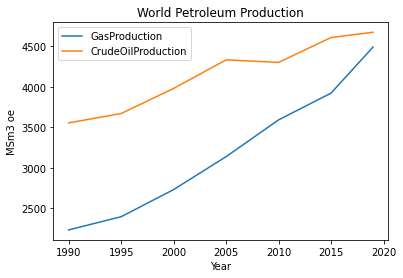

In [3]:
dataf = pd.DataFrame()  
# Data: https://www.iea.org/data-and-statistics/data-browser?country=WORLD&fuel=Natural%20gas&indicator=NatGasProd

GasProduction = [78497781,84242241,96039874,110356720,126344560,137990045,158000917] # TJ-gross
CrudeOilProduction = [2986766,3083616,3344435,3641160,3614555,3873148,3927967] # kt oe approx 1 Sm3 oe

conversiontoeTom3oe = 0.84
conversionTJtom3o3 = 0.0418680000000*1e6*conversiontoeTom3oe #TJ/MSm3oe
conversiontowTomMsm3oe = 1.0/conversiontoeTom3oe/1000.0 #ktoe/MSm3oe

gasprod = {'Year': [1990, 1995, 2000, 2005, 2010, 2015, 2019], 
           'GasProduction': [x/conversionTJtom3o3 for x in GasProduction], 
           'CrudeOilProduction': [x*conversiontowTomMsm3oe for x in CrudeOilProduction], 
           }

gasProdFrame = pd.DataFrame(gasprod)  
plot = gasProdFrame.plot(x="Year", y={"GasProduction","CrudeOilProduction"})
plot.set_ylabel("MSm3 oe")
plot.set_xlabel("Year")
plt.title("World Petroleum Production")

# Q2: CO2 emissions from petroleum activities
Import data and illustrate CO2 emissions from Norwegian petroleum activities, in other words from facilities on the continental shelf and from onshore facilities (see example and supplement with more data). Can you find data and do the same for world CO2 emissions from petroleum production? Perform an analysis of petroleum production volumes vs. CO2 emission from production. Can you give examples of technologies we can use for reducing CO2 emissions from production of oil and gas?

## Q2 solution:

Text(0.5, 1.0, 'CO2 emission from Norwegian Continental Shelf')

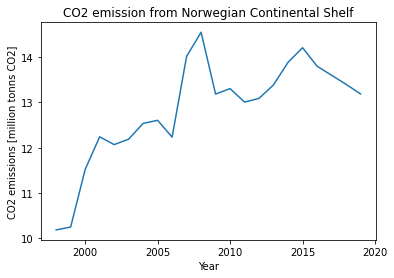

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url="https://www.norskpetroleum.no/wp-content/uploads/17-Klimagassutslipp-historie-prognose-stolpedia-14052019-2.xlsx"
xls = pd.ExcelFile(url) 
data = xls.parse('Fig-data', parse_cols = "B", skiprows = 22)
CO2data2 = data.rename(columns={"Unnamed: 1": "Year", "Emissions CO₂ equivalents ": "CO2 emissions"})

plt.plot( 'Year', 'CO2 emissions', data=CO2data2)
plt.ylabel('CO2 emissions [million tonns CO2]')
plt.xlabel('Year')
plt.title("CO2 emission from Norwegian Continental Shelf")


In [5]:
CO2Emissions2019 = 13.2 #mill tonns CO2 / year
production2019 = 215.88 # MSm3oe/year
m3PerBarrel = 0.119240471

CO2emissionsPerBarreloe2020 = CO2Emissions2019*1000 /  production2019 * m3PerBarrel # tonns/m3oe
print('approximate CO2 emission per Barrel for Norwegian Continental Shelf ', CO2emissionsPerBarreloe2020, ' kg CO2/Barrel oil')

approximate CO2 emission per Barrel for Norwegian Continental Shelf  7.290968210116732  kg CO2/Barrel oil


#World CO2 emissions from production
https://www.rystadenergy.com/newsevents/news/press-releases/an-analysis-of-the-upstream-industrys-dirty-laundry-whose-production-has-the-lowest-co2-intensity/

Their global CO2 intensity average is calculated at about 17 kg per barrel of oil equivalent (boe), but the estimate for all operators (including those that do not report) is 18-19 kg/boe. The total span ranges from less than 5 kg per boe to well above 100 kg per boe, but the vast majority of operators fall in the 10-40 kg per boe range.

In [ ]:
# Q1 NCS total production 
# Upload a file to Colab 
# Source to data : Fact Pages 
# https://factpages.npd.no/en/field/TableView/Production/Saleable/TotalNcsYear
# Production.csv
from google.colab import files
files.upload()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
production_data = pd.read_csv("production.csv")

x = production_data["prfYear"]
oil_Norway = production_data["prfPrdOilNetMillSm3"]
gas_Norway = production_data["prfPrdGasNetBillSm3"]
NGL = production_data["prfPrdNGLNetMillSm3"]
condensate = production_data["prfPrdCondensateNetMillSm3"]
total = production_data["prfPrdOeNetMillSm3"]
water = production_data["prfPrdProducedWaterInFieldMillSm3"]

#To make a picture bigger
plt.rcParams["figure.figsize"] = [12,12]
plt.rcParams.update({"font.size" : 18})

fig = plt.figure()
ax = fig.add_subplot(111)
line_oil = ax.plot(x,oil_Norway,label = "oil")
line_gas = ax.plot(x,gas_Norway,label = "Gas")
line_NGL = ax.plot(x,NGL,label = "NGL")
line_condensate= ax.plot(x,condensate,label = "Condensate")
line_total = ax.plot(x,total,label = "Total")
line_water = ax.plot(x,water,label = "Water production total")
ax.legend(loc = "upper left")
ax.set_xlabel("Year")
ax.set_ylabel("Production [MSm3 oe]")
ax.grid()
ax.set_title("Production of oil, gas, NGL, condensate and water annualy")
plt.show()

In [ ]:
# Q2 World total production 
# Upload a file to Colab 
# Source to data : iea, oil total production 
# https://www.iea.org/data-and-statistics/charts/world-oil-supply-and-demand-1971-2020
# Oil_world.csv
from google.colab import files
files.upload()

In [ ]:
#https://www.iea.org/data-and-statistics/charts/world-natural-gas-production-by-region-1973-2020 for gas data
# Gas_world.csv
files.upload()

In [ ]:

production_data_oil_world = pd.read_csv("Oil_world.csv")
production_data_gas_world = pd.read_csv("Gas_world.csv")

x_oil = production_data_oil_world["Year"]
x_gas = production_data_gas_world["Year"]

oil = production_data_oil_world["Crude oil and NGL production"]
gas = production_data_gas_world["Total"]


#To make a picture bigger
plt.rcParams["figure.figsize"] = [12,12]
plt.rcParams.update({"font.size" : 18})

fig = plt.figure()
ax = fig.add_subplot(111)
#ax1 = ax.twinx() if two axes better

line_oil = ax.plot(x_oil, oil,label = "Crude oil and NGL production")
line_gas = ax.plot(x_gas,gas,label = "Total Natural Gas Production", c = "red")

ax.legend()
#ax.legend(loc="upper left", bbox_to_anchor=(0.0,0.94))

ax.set_xlabel("Year")
ax.set_ylabel("Production Oil [MLN tonnes], Production Gas[MLN SM3 o.e]")
#ax1.set_ylabel("Production Gas[MLN SM3 o.e]")
ax.grid()
ax.set_title("World production of oil (including NGL) and natural gas annualy")
plt.show()

In [ ]:

#Import Norwegian emissions , included in exerc.
# Provided in the exercise
#CO2EmissionsNorway.csv
files.upload()

In [ ]:
#Import World emissions https://ourworldindata.org/co2-emissions\
#WorldCO2.csv
files.upload()


In [ ]:

data_CO2_world = pd.read_csv("WorldCO2.csv")
data_CO2_Norway = pd.read_csv("CO2EmissionsNorway.csv")

x_CO2_world = data_CO2_world["Year"]
x_CO2_Norway = data_CO2_Norway["Year"]

CO2_world = data_CO2_world["CO2"]
CO2_Norway = data_CO2_Norway["CO2"]

plt.rcParams["figure.figsize"] = [12,12]
plt.rcParams.update({"font.size" : 18})

#World
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax1 = ax.twinx()
line_oil = ax.plot(x_oil, oil,label = "Crude oil and NGL production in tonnes")
line_co2 = ax1.plot(x_CO2_world, CO2_world,label = "CO2 emissions in billion tonnes", c = "red")
ax.legend()
ax1.legend(loc="upper left", bbox_to_anchor=(0.0,0.94))
ax.set_xlabel("Year")
ax.set_ylabel("Production Oil [MLN tonnes]")
ax1.set_ylabel("Emissions of CO2 bln. tonnes")
ax.grid()
ax.set_title("World production of oil and CO2 emissions")
plt.show()


fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax1 = ax.twinx()
line_oil = ax.plot(x, total,label = "Crude oil production in Norway")
line_co2 = ax1.plot(x_CO2_Norway, CO2_Norway,label = "CO2 emissions ", c = "red")
ax.legend()
ax1.legend(loc="upper left", bbox_to_anchor=(0.0,0.94))
ax.set_xlabel("Year")
ax.set_ylabel("Production Oil [MLN tonnes]")
ax1.set_ylabel("Emissions of CO2 bln. tonnes")
ax.grid()
ax.set_title("Norwegian production of oil and CO2 emissions")
plt.show()

# Can you give examples of technologies we can use for reducing CO2 emissions from production of oil and gas?

* Improved energy efficiency of processes
* Electrification of power demanding processes
* Improved efficiency of pwoer production (eg. combined cycle)
* Stop flaring and venting of natural gas

# Q3: Introductory questions for discussion and analysis

* Why does natural gas have to be processed?
* Why is power needed in the production of natural gas and
oil?
* What are the main energy consuming operations in natural gas processing and transport? 
* What processes lead to environmental emissions (eg. CO2 emission)?
* Discuss pros and cons of natural gas transport in pipelines vs as LNG
* How much gas turbine power generation do we have in
Norway?
* Why is CO2 capture and storage the obvious and simple
solution to environmental problems in power generation? or
is it?
* What is the total Norwegian and the total world production of hydrogen? 

## Q3 solution:
# Why does natural gas have to be processed?

Natural gas in the reservoir can contain relatively high amounts of heavy hydrocarbons, water, CO2, nercury, H2S, etc. The natural gas used by consumers needs to fulfill gas quality specifications. THese specifications sets limits for the components mentioned (eg. water dew point, hydrocarbon dew point, CO2. etc.). To meet the natural gas specifications, the gas has to be processed.

# Why is power needed in the production of natural gas and oil?
Power is needed in a number of steps in natural gas processing
* Compression power (for beeing able to transport the gas)
* Distillation processes (for making specific products such as propane, butane, etc.)
* Pumps (for pumping liquids)
* Heaters (for heating the oil and gas)
* Etc.

# What are the main energy consuming operations in natural gas processing and transport?
Power for running compressors are typically the main nergy consuming operations in natural gas processing and transport.


# What processes lead to environmental emissions (eg. CO2 emission)?
* Power production from gas turbines
* Flaring of natural gas
* Venting of natural gas
* Ship transport of oil/gas

See: https://www.sintef.no/globalassets/project/effort/effort-presentation-at-the-otc-conference-houston-may-6-2013.pdf

# Discuss pros and cons of natural gas transport in pipelines vs as LNG

Pro:
Pipelines:
* Less energy for processing (no need for cooling to low temperatures)
* Good solution if marked is close to production
* Less CO2 emissions

LNG:
* Good solution if marked is far from production
* Flexible solution (can sell to many markeds)

# How much gas turbine power generation do we have in Norway?

https://norskoljeoggass.no/contentassets/4e950643dd0447d994b4673f5064bce8/endrava_rapport_bruk-av-gass-i-europa.pdf

About. 50 TWh gas consumption in gas turbines. Assume an average efficiency of 30%, which then means 15 TWh of power (or shaft power, some of the turbines drive various equipment directly). Furthermore, assume that a typical GT is driven 8000 h per year (out of 8760 h). It will then be around 1875 MW shaft power. Installed power is significantly higher than the suspected partial load, backup,etc.

# Why is CO2 capture and storage the obvious and simple solution to environmental problems in power generation? or is it?
See:
https://www.ipcc.ch/site/assets/uploads/2018/03/srccs_wholereport-1.pdf


